Data Analysis Interview Challenge

Data description
● city: city this user signed up in 
● phone: primary device for this user 
● signup_date: date of account registration; in the form ‘YYYY MM DD’ 
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’ 
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup 
● avg_rating_by_driver: the rider’s average rating over all of their trips 
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
● surge_pct: the percent of trips taken with surge multiplier > 1 
● avg_surge: The average surge multiplier over all of this user’s trips 
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_json('ultimate_data_challenge.json')
logins = pd.read_json('logins.json')

In [3]:
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [4]:
data = data.astype({'city': 'string',
                    'trips_in_first_30_days': 'int64',
                    'signup_date': 'string',
                    'avg_rating_of_driver': 'float64',
                    'avg_surge': 'float64',
                    'last_trip_date': 'string',
                    'phone': 'string',
                    'surge_pct': 'float64',
                    'ultimate_black_user': bool,
                    'weekday_pct': 'float64',
                    'avg_dist': 'float64',
                    'avg_rating_by_driver': 'float64'})
data.dtypes

city                       string
trips_in_first_30_days      int64
signup_date                string
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             string
phone                      string
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [5]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [6]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

# Part 1 ‑ Exploratory data analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

1. Aggregate these login counts based on 15­ minute time intervals

1. visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

1. Please report/illustrate important features of the demand, such as daily cycles. 

1. If there are data quality issues, please report them.

In [7]:
def plot_grouped(grouped, by=None):
    mean = grouped.count().mean().iloc[0]
    std = grouped.count().std().iloc[0]
    grouped.count().plot()
    plt.axhline(mean, color='gray', linestyle = '-', alpha=0.5, label='mean')
    plt.axhline(mean+std, color='gray', linestyle = '--', alpha=0.2, label='1 st. dev.')
    plt.axhline(mean-std, color='gray', linestyle = '--', alpha=0.2)
    plt.legend()

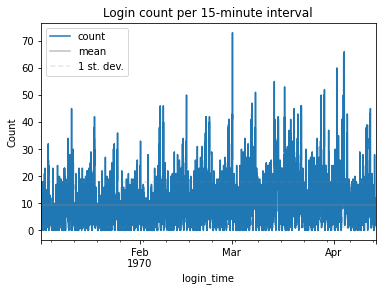

In [8]:
logins['count'] = 1

logins_15T = logins.groupby(pd.Grouper(key='login_time', freq='15T'))

plot_grouped(logins_15T)
plt.title('Login count per 15-minute interval')
plt.ylabel('Count')

logins = logins.drop(columns='count')

The chart is hard to read at this level of granularity.

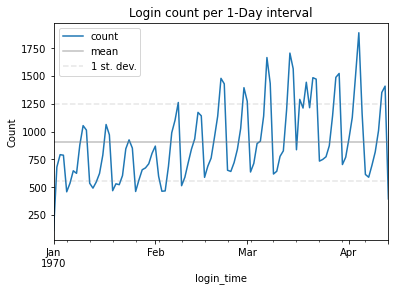

In [9]:
logins['count'] = 1
logins_1D = logins.groupby(pd.Grouper(key='login_time', freq='1D'))

plot_grouped(logins_1D)
plt.title('Login count per 1-Day interval')
plt.ylabel('Count')

logins = logins.drop(columns='count')

There is a slight positive trend and an increase in variance over time.

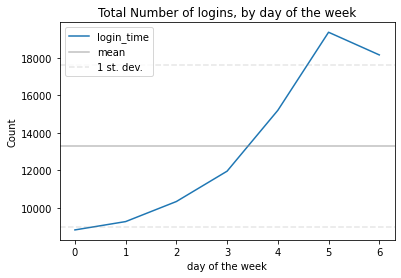

In [10]:
logins_by_day_of_week = logins.groupby(logins['login_time'].dt.day_of_week)

plot_grouped(logins_by_day_of_week)
plt.title('Total Number of logins, by day of the week')
plt.ylabel('Count')
plt.xlabel('day of the week');

The lowest number of logins is on day 0 (Monday) and the highest number of logins are on day 5 and 6 (Saturday and Sunday).

Text(0.5, 0, 'Hour of the day')

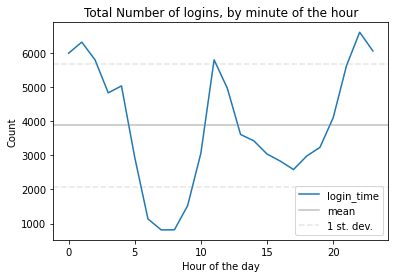

In [11]:
logins_by_hour =logins.groupby(logins['login_time'].dt.hour)

plot_grouped(logins_by_hour)
plt.title('Total Number of logins, by minute of the hour')
plt.ylabel('Count')
plt.xlabel('Hour of the day')

The lowest number of logins is from 5am to 9am, and the highest number of logins is from 9pm to 2am.

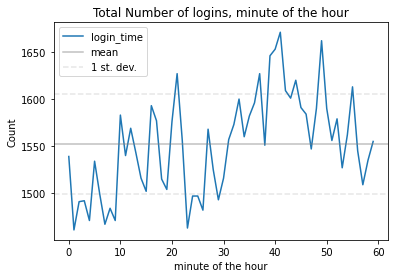

In [12]:
logins_by_minute = logins.groupby(logins['login_time'].dt.minute)
by = 'minute of the hour'

plot_grouped(logins_by_minute)
plt.title(f'Total Number of logins, {by}')
plt.ylabel('Count')
plt.xlabel(f'{by}');

All the minutes of the hour are within 2 standard deviations of the mean.

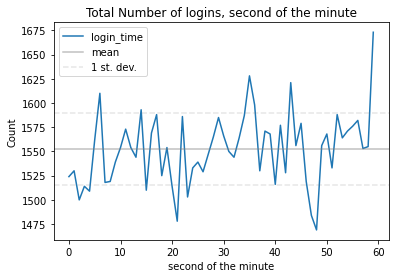

In [13]:
logins_by_minute = logins.groupby(logins['login_time'].dt.second)
by = 'second of the minute'

plot_grouped(logins_by_minute)
plt.title(f'Total Number of logins, {by}')
plt.ylabel('Count')
plt.xlabel(f'{by}');

There is an unexpectedly large number of logins (2+ standard deviations) at the 59th second of the minute.

In [14]:
## Visualize and describe the resulting time series of login counts in ways that best 
#characterize the underlying patterns of the demand. 
logins_15.count()

NameError: name 'logins_15' is not defined

The most useful chart was the demand grouped by day of the week as there is a clear difference in the days of the week that did not appear to be noise. The other charts showed some moderate differences but they were probaly attributable to noise.

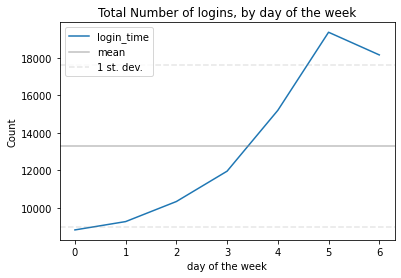

In [213]:
logins_by_day_of_week = logins.groupby(logins['login_time'].dt.day_of_week)

plot_grouped(logins_by_day_of_week)
plt.title('Total Number of logins, by day of the week')
plt.ylabel('Count')
plt.xlabel('day of the week');

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

The key measure of success would be an increase in the number of trips that begin in one city and end in the other city.

A practical experiment to compare the effectiveness of this change wouild be to allow a small sample of drivers in both cities to pass through the bridge with all tools reimbursed and measure if there is a differcne in the sample drivers' behavior relative to the control group (other drivers that aren't reimbursed for tolls).

a. The experiement could be implemented by selectings a particularly active group of drivers, say the top 5%, and then randomly selecting 10% of this group to be the experimental group, and the remaining 90% to be the control group. Both groups will be notified with a messege encouraging them to drive accross the bridge (such as "Come see what going on the other side!") and offer a non-tangible reward with no monetary value for doing so ("Get the new Adventurerer badge by crossing the bridge this week!"). The experiment group will have additional language in their messege stating that all tolls will be reimbursed for the test period.

b. The primary stastistical test would be a paired t-test to compare the mean crossings per driver for each of the two groups.

c. Assuming the differences are statistically significant, I would check if teh results are of practical significance next. Practical significance could be measuring the total economic value created when a drivers crosses the brisdge and comparing the toll revenue that would be forgone by each crossing.

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account inJanuary 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?


In [15]:
data.dtypes

city                       string
trips_in_first_30_days      int64
signup_date                string
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             string
phone                      string
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [223]:
data['time_between_signup_and_final_trip'] = pd.time_data['last_trip_date'] - data['signup_date']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­ term rider retention (again, a few sentences will suffice).
